<a href="https://colab.research.google.com/github/wesleycb99/classificacaodefault/blob/main/Classifica%C3%A7%C3%A3o_de_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Classificação de Default**
# **Objetivo**

O objetivo da modelagem é classificar os clientes inadimplentes, ou como se diz no meio, o risco de default. Podemos fazer longas discussões sobre o conceito de default com base em estudos e exigências regulatórias mas para efeitos deste projeto, um cliente em default é aquele que está em 60 dias de atraso ou mais. Então classificaremos os clientes como 'bons' e 'maus' assim:

- **Maus pagadores**: são aqueles que entraram em 'default' (atraso 60 dias ou mais) nos 24 meses seguintes à aquisição do cartão de crédito.

- **Bons pagadores**: são considerados todos os demais.

- **Excluídos**: Clientes que não adquiriram um cartão de crédito (seja por recusa, seja por desistência) não possuem informações de pagamento, portanto não se pode identificar se são bons ou maus. Há uma longa discussão e literatura sobre inferência de rejeitados que está fora do escopo deste exercício.

# **Dados Utilizados**

Para alcançar os objetivos propostos, foram utilizadas duas bases de dados principais:


**1. Base de Propostas (application_records.csv)**




| Nome da Variável         | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID| identificador do cliente (chave) |inteiro|
| CODE_GENDER| M = 'Masculino'; F = 'Feminino' |M/F|
| FLAG_OWN_CAR| Y = 'possui'; N = 'não possui' |Y/N|
| FLAG_OWN_REALTY| Y = 'possui'; N = 'não possui' |Y/N|
| CNT_CHILDREN| Quantidade de filhos |inteiro|
| AMT_INCOME_TOTAL| Annual income |inteiro|
| NAME_INCOME_TYPE|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| NAME_EDUCATION_TYPE| Nível de educação (ex: secundário, superior etc) |texto|
| NAME_FAMILY_STATUS | Estado civil (ex: solteiro, casado etc)| texto |
| NAME_HOUSING_TYPE | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| DAYS_BIRTH | Count backwards from current day (0), -1 means yesterday |inteiro|
| DAYS_EMPLOYED | Count backwards from current day (0), -1 means yesterday |inteiro|
| FLAG_MOBIL | Indica se possui celular (1 = sim, 0 = não) |binária|
| FLAG_WORK_PHONE | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| FLAG_PHONE | Indica se possui telefone (1 = sim, 0 = não) |binária|
| FLAG_EMAIL | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| OCCUPATION_TYPE | Occupation	 |Qualitativa|
| CNT_FAM_MEMBERS | quantidade de pessoas na residência |inteiro|






**Base de pagamentos (pagamentos_largo.csv)**





| Nome da Variável         | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID| identificador do cliente (chave) |inteiro|
| mes_00 a mes_24| faixa de atraso mês a mês do cliente <br>0: 1-29 days past due &nbsp;&nbsp;&nbsp;&nbsp; 1: 30-59 days past due <br />2: 60-89 days overdue &nbsp;&nbsp;&nbsp;&nbsp; 3: 90-119 days overdue <br /> 4: 120-149 days overdue &nbsp;&nbsp;&nbsp;&nbsp; 5: more than 150 days <br />C: paid off that month &nbsp;&nbsp;&nbsp;&nbsp; X: No loan for the month |Qualitativa|


- Importando as bibliotecas

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- Carregando as bases de dados

In [190]:
propostas = pd.read_csv('application_record.csv')
pg = pd.read_csv('pagamentos_largo.csv')

In [191]:
propostas.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [192]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pg.head()

,ID,mes_0,mes_1,mes_10,mes_11,mes_12,mes_13,mes_14,mes_15,mes_16,mes_17,mes_18,mes_19,mes_2,mes_20,mes_21,mes_22,mes_23,mes_24,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9
0,5001718,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,0,NaN
1,5001719,0,0,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C
2,5001720,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,5001723,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN
4,5001726,0,0,C,C,C,C,C,C,C,C,C,C,0,C,C,C,C,C,0,0,0,C,C,C,C


- Explorando as bases de dados

In [193]:
propostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [194]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20937 entries, 0 to 20936
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      20937 non-null  int64 
 1   mes_0   20937 non-null  object
 2   mes_1   19216 non-null  object
 3   mes_10  17455 non-null  object
 4   mes_11  16972 non-null  object
 5   mes_12  16943 non-null  object
 6   mes_13  16540 non-null  object
 7   mes_14  16525 non-null  object
 8   mes_15  16155 non-null  object
 9   mes_16  16093 non-null  object
 10  mes_17  15911 non-null  object
 11  mes_18  15630 non-null  object
 12  mes_19  15336 non-null  object
 13  mes_2   19348 non-null  object
 14  mes_20  15184 non-null  object
 15  mes_21  15076 non-null  object
 16  mes_22  14797 non-null  object
 17  mes_23  14598 non-null  object
 18  mes_24  14433 non-null  object
 19  mes_3   18925 non-null  object
 20  mes_4   18802 non-null  object
 21  mes_5   18512 non-null  object
 22  mes_6   18214 non-null

- Verificando se existem dados faltantes.

In [195]:
propostas.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


- Podemos verificar que a variavel OCCUPATION_TYPE contem 134.203 missing, vamos explorar um pouco mais essa variavel.

In [196]:
propostas['OCCUPATION_TYPE'].value_counts()

,count
OCCUPATION_TYPE,
Laborers,78240
Core staff,43007
Sales staff,41098
Managers,35487
Drivers,26090
High skill tech staff,17289
Accountants,15985
Medicine staff,13520
Cooking staff,8076


- Observamos que a variável OCCUPATION_TYPE contém informações sobre a ocupação de cada proponente.
-  Para lidar com esses valores ausentes, optamos por imputar a categoria 'Não Informado'. Essa abordagem garante que todos os registros permaneçam no conjunto de dados e proporciona uma forma clara de indicar que a informação de ocupação não foi fornecida.

In [197]:
propostas['OCCUPATION_TYPE'].fillna('Not informed', inplace=True)
propostas['OCCUPATION_TYPE'].value_counts()

,count
OCCUPATION_TYPE,
Not informed,134203
Laborers,78240
Core staff,43007
Sales staff,41098
Managers,35487
Drivers,26090
High skill tech staff,17289
Accountants,15985
Medicine staff,13520


In [198]:
pg.isnull().sum()

,0
ID,0
mes_0,0
mes_1,1721
mes_10,3482
mes_11,3965
mes_12,3994
mes_13,4397
mes_14,4412
mes_15,4782
mes_16,4844


-
Na base de pagamentos há muitos valores ausentes, substituiremos esses valores por "C", assumindo que a falta de informação indica que o pagamento foi realizado no mês.

Lembando que:

**C**: paid off that month

In [199]:
pg.fillna('C', inplace=True)
pg.isnull().sum()

,0
ID,0
mes_0,0
mes_1,0
mes_10,0
mes_11,0
mes_12,0
mes_13,0
mes_14,0
mes_15,0
mes_16,0


- Agora, com os dados tratados, vamos analisar quantos clientes passaram a estar em default.

Lembando que será considerado default clientes que estão a mais de 60 dias sem pagar


2: 60-89 days overdue

3: 90-119 days overdue

4: 120-149 days overdue    
  
5: more than 150 days





In [200]:
default = ['2', '3', '4', '5']
pg_mask = pg.isin(default)
pg['default'] = pg_mask.sum(axis=1)
pg.head()

,ID,mes_0,mes_1,mes_10,mes_11,mes_12,mes_13,mes_14,mes_15,mes_16,mes_17,mes_18,mes_19,mes_2,mes_20,mes_21,mes_22,mes_23,mes_24,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,default
0,5001718,0,0,0,0,0,0,0,0,C,0,0,0,0,C,C,C,0,C,0,0,0,0,C,0,C,0
1,5001719,0,0,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,0
2,5001720,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,5001723,0,0,C,C,C,C,C,C,C,C,C,C,0,C,C,C,C,C,0,0,0,0,0,C,C,0
4,5001726,0,0,C,C,C,C,C,C,C,C,C,C,0,C,C,C,C,C,0,0,0,C,C,C,C,0


- Marcando se o cliente teve pelo menos um episódio de default.



In [201]:
pg['tem_default'] = pg['default'] > 1

- Agora, para identificar os clientes em default, devemos limitar a análise aos clientes que adquiriram um cartão de crédito. A abordagem será focar exclusivamente nos clientes da base de propostas que também estão presentes na base de pagamentos.

- Para isso, utilizaremos um inner join entre a base de propostas e a base de pagamentos, garantindo que apenas os clientes que aparecem em ambas as bases sejam considerados na análise.

In [203]:
base_consolidada = propostas.merge(pg[['ID','tem_default']], on='ID', how='inner')
base_consolidada.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,tem_default
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,False
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,False


Quantidade de clientes com default:


Clientes sem default = False

Clientes com default = True

In [204]:
base_consolidada['tem_default'].value_counts()

,count
tem_default,
False,16418
True,232


Procentagem:

In [205]:
base_consolidada['tem_default'].value_counts(1)

,proportion
tem_default,
False,0.986066
True,0.013934


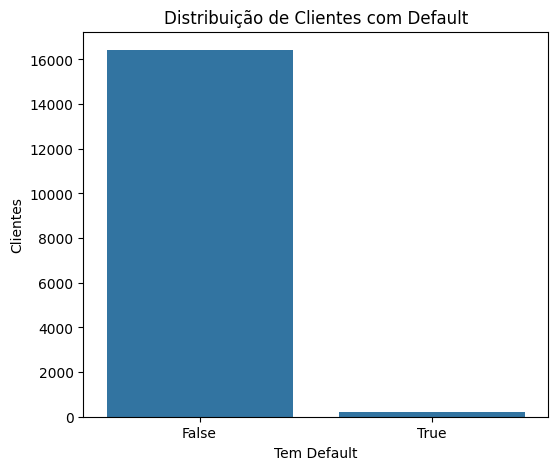

In [206]:
plt.figure(figsize=(6,5))
sns.countplot(base_consolidada, x='tem_default')
plt.title('Distribuição de Clientes com Default')
plt.xlabel('Tem Default')
plt.ylabel('Clientes')

plt.show()

### **Analisando os dados de todos os clientes, verificamos que 98,6% são bons pagadores, enquanto 1,4% são maus pagadores.**

In [223]:
base_consolidada.loc[base_consolidada['tem_default'] == False, 'classificacao'] = 'bom_pagador'
base_consolidada.loc[base_consolidada['tem_default'] == True, 'classificacao'] = 'mau_pagador'
base_consolidada['classificacao'].value_counts()

,count
classificacao,
bom_pagador,16418
mau_pagador,232


In [224]:
base_consolidada.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,tem_default,classificacao
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False,bom_pagador
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False,bom_pagador
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False,bom_pagador
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,False,bom_pagador
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,False,bom_pagador
